In [40]:
import networkx as nx
import time
import json
import matplotlib.pyplot as plt

Dans un premier temps, nous avons fait en sorte d'avoir un dictionnaire sous la forme : 

{Nom_du_Film : {cast : [liste_des_acteurs]}, {director : [liste_des_directeurs]}, {producers : [liste_des_producteurs]}, {companies: [liste_des_companies]}, {year: [Date_de_sorti]}}



In [41]:
def convert_txt_to_dict(nom_fichier):
    """charge un fichier de lignes json en dictionnaire 

    Args:
        nom_fichier (str): nom du fichier txt contenant les lignes json

    Returns:
        dict: le dictionnaire avec le contenus du fichier
    """
    with open(nom_fichier, encoding='utf-8') as fichier_open:
        lignes = fichier_open.readlines()
        dico = {}
        for json_data in lignes:
            Data = json.loads(json_data)
            titre = Data["title"].replace("[[", "").replace("]]", "")
            cast = [personne.split("|")[0].split("(")[0].replace("[[", "").replace("]]", "") if "|" in personne else personne.replace("[[", "").replace("]]", "") for personne in Data.get("cast", [])]
            directeur = [director.replace("[[", "").replace("]]", "") for director in Data.get("directors", [])]
            producteur = [prod.replace("[[", "").replace("]]", "") for prod in Data.get("producers", [])]
            companies = [comp.replace("[[", "").replace("]]", "") for comp in Data.get("companies", [])]
            annee_sorti = Data.get("year", [])

            dico[titre] = {
                "cast": cast,
                "director": directeur,
                "producers": producteur,
                "companies": companies,
                "year": annee_sorti
            }
    return dico

dictionnaire_fichier = convert_txt_to_dict("medium_plus_data.txt")

Avec ce dictionnaire, nous avons crée le graph

In [42]:
def creation_graphe(dico): # complexité quadratique (à améliorer si possible)
    g = nx.DiGraph()
    acteurs_vue = set()
    for film in dico.values():
        for i in range(len(film["cast"])):
            acteur1 = film["cast"][i]
            if acteur1 not in acteurs_vue: 
                g.add_node(acteur1)
                acteurs_vue.add(acteur1)
            for b in range(i+1, len(film["cast"])):
                acteur2 = film["cast"][b]
                if acteur2 not in acteurs_vue:
                    g.add_node(acteur2)
                    acteurs_vue.add(acteur2)
                g.add_edge(acteur1, acteur2, length=10)
    return g

Graphe = creation_graphe(dictionnaire_fichier)

Et le dessiné, pour pouvoir le dessiné nous allons utilisé une petite proportion des données.

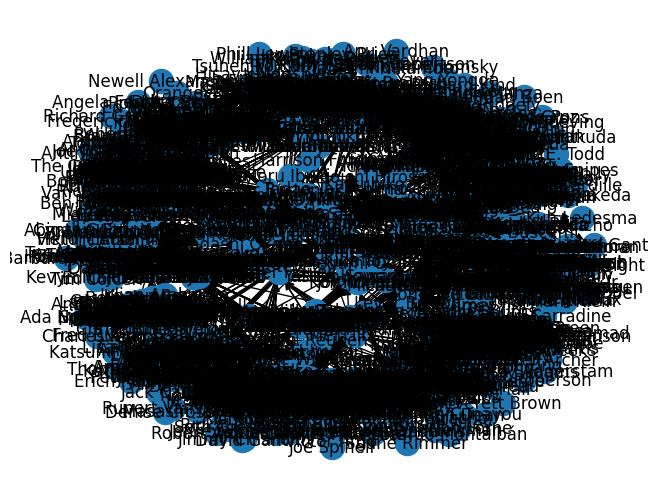

In [43]:
# Le dessin prend beaucoup de temps
def dessine_graph(G):
    nx.draw(G, with_labels=True)
dessine_graph(creation_graphe(convert_txt_to_dict("medium_data.txt")))

La fonction calculer_centralite_acteur, permet d'optenir le centralite d'un acteur dans le graphe.

Nous utilisons la fonction closeness_centrality de networkx, qui permet d'optenir la centralité de l'acteur en utilisant le parcour en largeur.

In [44]:
def calculer_centralite_acteur(Gc, acteur):
    return nx.closeness_centrality(Gc, u=acteur)

print(calculer_centralite_acteur(Graphe, "Tommy Lee Jones"))

0.18729895658566184


La fonction trouver_acteur_plus_central permet d'optenir l'acteur qui est le plus au centre du Graphe
Pour cela nous utilison encore la fonction closeness_centrality de networkx, pour avoir la centralité de toute les acteurs du graphe, puis optenir le maximum

In [ ]:
def trouver_acteur_plus_central(G):
    noeud_proximite = nx.closeness_centrality(G)
    noeud_central = max(noeud_proximite, key=noeud_proximite.get)
    return noeud_central


print(trouver_acteur_plus_central(Graphe))

In [ ]:
def distance_maximale_entre_acteurs(G):
    distances = []
    for acteur1 in G.nodes():
        for acteur2 in G.nodes():
            if acteur1 != acteur2:
                try:
                    distance = nx.shortest_path_length(G, acteur1, acteur2)
                    distances.append(distance)
                except nx.NetworkXNoPath:
                    # Si aucun chemin n'existe entre les acteurs, la distance est infinie
                    distances.append(0)  # Distance 0 pour représenter une distance infinie
    distance_max = max(distances)
    return distance_max

print(distance_maximale_entre_acteurs(Graphe))